In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import polars as pl

In [5]:
csv_path = "../reports/features/SimpleCAE32/2023-07-10/13-09-32/feature_check_data_clustering.csv"
df = pl.read_csv(csv_path)

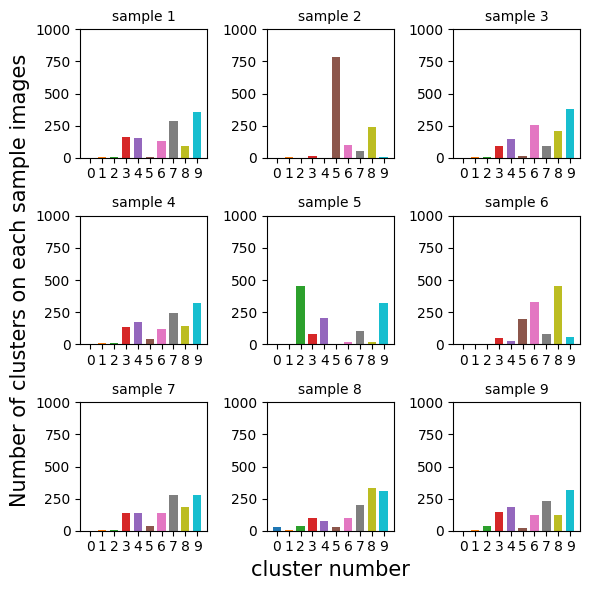

In [96]:
colors: list[matplotlib.colors.ListedColormap] = [plt.get_cmap("tab10")(i) for i in range(num_clusters)]
num_clusters = 10
image_classes = np.unique(df.select(pl.col("dirname")).to_numpy())

x_ticks = np.arange(num_clusters)
fig = plt.figure(figsize=(6,6), dpi=150,tight_layout=True)
fig.subplots_adjust(wspace=0.5, hspace=0.6)
y_range_max = 0
axes = fig.subplots(3, 3,)

for i, image_class in enumerate(image_classes):
    
    n,m = divmod(i, 3)
    ax: plt.Axes = axes[n, m]
    
    _df = df.filter(pl.col("dirname") == image_class)
    contained_clusters = _df.select("cluster").to_numpy().flatten()
    
    hist, _ = np.histogram(contained_clusters, num_clusters, range=(0,9))
    ax.bar(x_ticks, hist, width=0.7, color=colors)
        
    ax.set_title(f"sample {image_class+1}", fontsize=10)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks)
    
    
    _, y_max = ax.get_ylim()
    if y_max > y_range_max:
        y_range_max = y_max
    
    # ax.legend()
    if i == 3:
        ax.set_ylabel('Number of clusters on each sample images', fontsize=15)
    elif i == 7:
        ax.set_xlabel('cluster number', fontsize=15)

for i in range(len(image_classes)):
    n, m = divmod(i, 3)
    ax: plt.Axes = axes[n, m]
    ax.set_ylim(0, 1000)

plt.tight_layout()
fig.savefig("../reports/figures/VBGMM/2023-07-10/reconcatenate_images/distribution_on_image_.jpg")